# Zufällige Sitzpläne zur Förderung der sozialen Kooperation
## 🧾 Management Summary: 

### 🎯 Ausgangslage

In der Berufsbildung ist **soziale Zusammenarbeit** ein zentraler Bestandteil des Lernprozesses. Damit Lernende lernen, sich in verschiedenen Teams zurechtzufinden, möchten wir als Schule erreichen, dass sie **jede Woche mit unterschiedlichen Personen zusammenarbeiten**.

Dazu gehört auch, dass **Sitzordnungen regelmäßig neu durchmischt werden**, um Gruppendynamik zu fördern und Untergruppenbildung (z. B. Cliquen) zu vermeiden.  
Das stärkt nicht nur das soziale Miteinander, sondern verbessert langfristig auch die Teamfähigkeit der Lernenden – eine wichtige Kompetenz für die Berufswelt.

### ❗ Das Problem

Die Erstellung neuer Sitzpläne ist im Alltag jedoch **zeitaufwändig** und **fehleranfällig**. Zwar bietet das bestehende Absenzsystem eine Funktion zur Zufallsverteilung, doch diese ist unpraktisch:

- Sie erstellt lediglich **Listen**, aber keine klare **Raumzuweisung**
- Lehrpersonen wissen oft **nicht auf einen Blick**, wer wo sitzt
- Es kommt zu **Diskussionen** oder **Verzögerungen**
- Das kostet wertvolle **Unterrichtszeit – jede Woche aufs Neue**


### ✅ Lösungsvariante: Automatisierte Sitzplan-Visualisierung

Der von uns entwickelte Python-Code schafft hier eine einfache, aber sehr wirkungsvolle Lösung:

- Die Sitzordnung wird **automatisch und zufällig** erstellt
- Die Platzierung erfolgt **grafisch auf dem tatsächlichen Raumplan**
- Jeder Sitzplatz wird **klar mit Namen und Bild (Avatar)** gekennzeichnet
- Die Konfiguration ist flexibel – z. B. 3 Personen pro Tisch, freie Plätze, Sonderplätze
- Der Plan kann **wöchentlich neu generiert** und als **PDF oder Bild gespeichert** werden


## 💡 Der Mehrwert

- **Klarheit & Übersicht**: Lehrpersonen und Lernende sehen sofort, wer wo sitzt – ohne Diskussion
- **Zeitersparnis**: Kein manuelles Zuweisen, kein Erklären – der Sitzplan ist direkt bereit
- **Förderung der sozialen Kompetenz**: Regelmäßige Zufallsgruppen fördern Teamfähigkeit, Zusammenarbeit und Klassenzusammenhalt
- **Flexibilität**: Änderungen im Raum oder bei der Gruppengröße lassen sich einfach anpassen


## 📌 Fazit

Die automatisierte Sitzplan-Visualisierung hilft, die Unterrichtszeit optimal zu nutzen, die Zusammenarbeit in der Klasse zu fördern und gleichzeitig die Lehrpersonen administrativ zu entlasten.  
Sie ist ein einfaches, aber wirkungsvolles Werkzeug für moderne Berufsbildung mit sozialem Fokus.


# Variante 1
Textbasierte Generierung von Gruppen

In [6]:
import pandas as pd
import random

# Einstellungen
zeilenabstand = 42  # (Wird aktuell nicht verwendet, könnte für spätere Formatierung wichtig sein)
schriftgroesse = 12  # (Auch aktuell nicht genutzt)

# CSV-Datei laden (Komma als Trennzeichen)
# Achtung: Wenn deine Datei Semikolons nutzt, verwende sep=';' statt sep=','
daten = pd.read_csv('data/ExampleClass2025.csv', sep=',')

# Liste der Nachnamen aus der Spalte "L_NAME", leere Werte werden entfernt
namen_liste = daten['L_NAME'].dropna().tolist()

# Namen zufällig durchmischen
random.shuffle(namen_liste)

# Anzahl der gewünschten Gruppen
anzahl_gruppen = 6

# Leere Gruppen vorbereiten (eine Liste mit 6 leeren Listen)
gruppen = []
for _ in range(anzahl_gruppen):
    gruppen.append([])

# Namen nacheinander den Gruppen zuweisen (runde Verteilung)
aktueller_index = 0
for name in namen_liste:
    gruppen[aktueller_index].append(name)
    aktueller_index = (aktueller_index + 1) % anzahl_gruppen  # von 0 bis 5 im Kreis

# Ausgabe der Gruppen
for nummer, gruppe in enumerate(gruppen, start=1):
    print(f"Gruppe {nummer}:")
    for name in gruppe:
        print(f"  - {name}")
    print()

Gruppe 1:
  - Steiner
  - Meier
  - Baumgartner
  - Dufour

Gruppe 2:
  - Rossi
  - Patel
  - Zuberbühler

Gruppe 3:
  - Schmid
  - Müller
  - Yilmaz

Gruppe 4:
  - Da Silva
  - Makoundou
  - Amini

Gruppe 5:
  - Haddad
  - Ivanov
  - Nguyen

Gruppe 6:
  - Hertig
  - Demiri
  - Fernández



# Variante 2
Visuelle Ansicht mit Boxen, einfache Auflistung

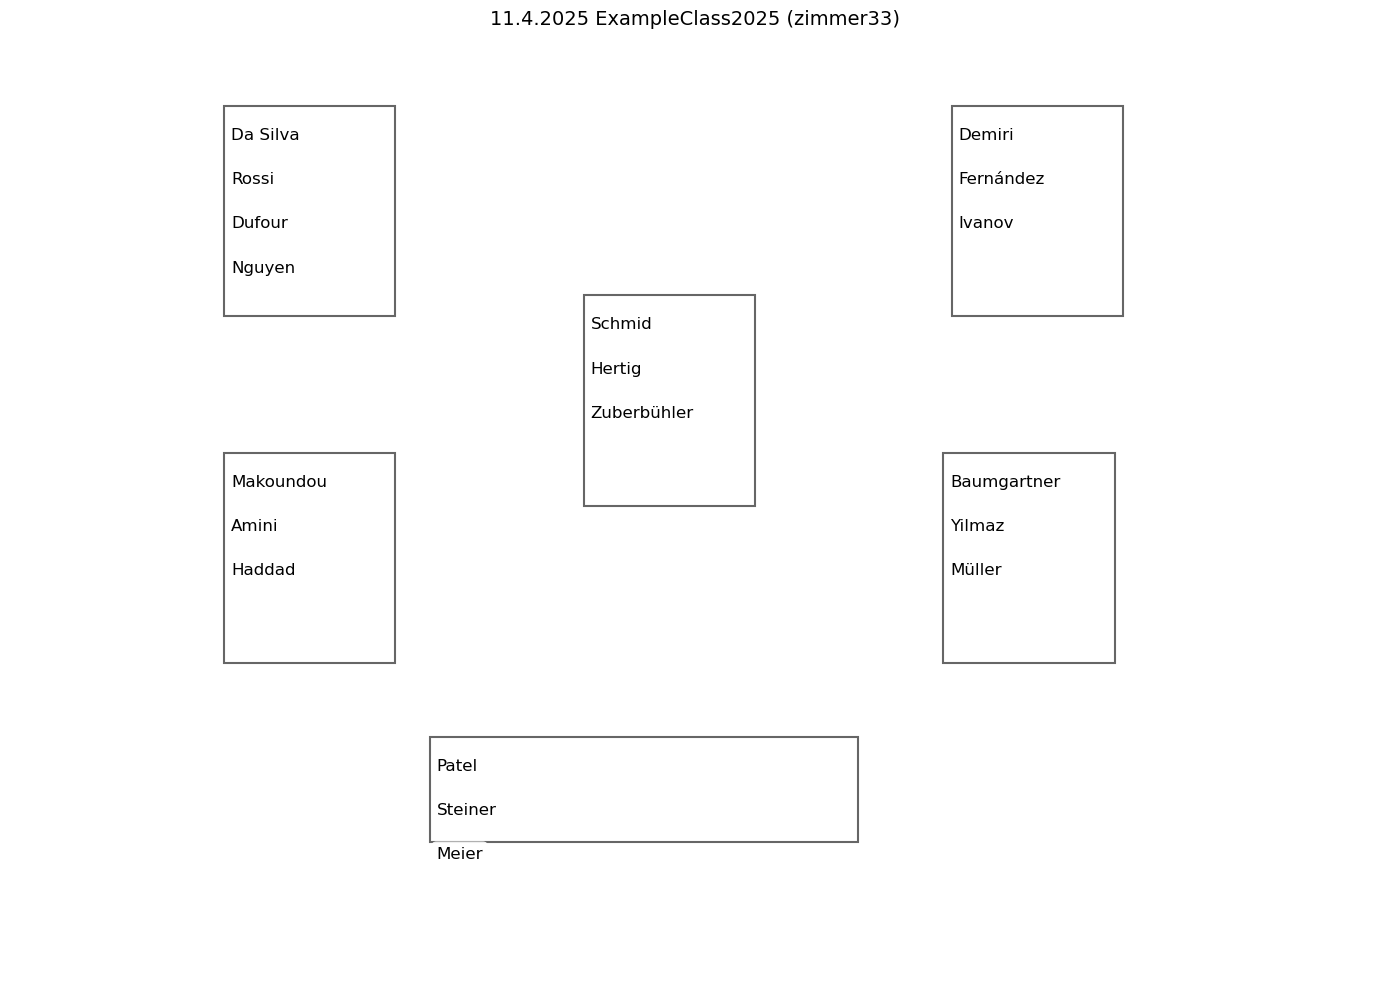

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import math

zeilenabstand = 42
schriftgroesse = 12

# CSV laden (mit Semikolon als Trennzeichen)
df = pd.read_csv('data/ExampleClass2025.csv', sep=',')
names = df['L_NAME'].dropna().tolist()

# Namen mischen
random.shuffle(names)

# Tisch-Koordinaten (x, y, breite, höhe)
tische = [
    (250, 470, 200, 200),
    (1100, 470, 200, 200),
    (670, 650, 200, 200),
    (250, 800, 200, 200),
    (1090, 800, 200, 200),
    (490, 1070, 500, 100)
]

# Gleichmässige Verteilung der Namen
num_tables = len(tische)
verteilung = [[] for _ in range(num_tables)]

for i, name in enumerate(names):
    index = i % num_tables
    verteilung[index].append(name)

# Plot vorbereiten
fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 1600)
ax.set_ylim(1300, 400)  # angepasst, damit Tische nach unten gehen (Y-Achse "richtig herum")
ax.axis('off')  # keine Achsen anzeigen

# Namen auf Tische zeichnen
for idx, (x, y, w, h) in enumerate(tische):
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor='black', facecolor='white', alpha=0.6)
    ax.add_patch(rect)

    namen = verteilung[idx]
    for i, name in enumerate(namen):
        ax.text(
            x + 8,
            y + 20 + i * zeilenabstand,
            name,
            fontsize=schriftgroesse,
            verticalalignment='top',
            color='black',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.9, boxstyle='round,pad=0.3')
        )

# --- ANZEIGE ---
# Achsen ausblenden
ax.axis('off')  # keine Achsen anzeigen

klasse = csv_pfad.split("/")[-1].split(".csv")[0]
datum = datetime.today().strftime("%-d.%-m.%Y")

plt.title(f"{datum} {klasse} ({zimmer})", fontsize=14)
plt.tight_layout()

plt.savefig(export_pfad, dpi=300, bbox_inches='tight')

plt.show()


# Variante 3
Visuelle Ansicht mit realistischen Grundplan, einfache Auflistung

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random
import math

# Bild laden
img = mpimg.imread('img/floorplans/zimmer33.png')
height, width = img.shape[0], img.shape[1]

zeilenabstand = 42
schriftgroesse = 12

# CSV laden (mit Semikolon als Trennzeichen)
df = pd.read_csv('data/ExampleClass2025.csv', sep=',')
names = df['L_NAME'].dropna().tolist()

# Namen mischen
random.shuffle(names)

# Neue Tisch-Koordinaten und Grössen: (x, y, breite, höhe)
tische = [
    (250, 470, 200, 200),
    (1100, 470, 200, 200),
    (670, 650, 200, 200),
    (250, 800, 200, 200),
    (1090, 800, 200, 200),
    (490, 1070, 500, 100)
]

# Gleichmässige Verteilung der Namen
num_tables = len(tische)
verteilung = [[] for _ in range(num_tables)]

for i, name in enumerate(names):
    index = i % num_tables
    verteilung[index].append(name)

# Plot vorbereiten
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(img)

# Namen auf Tische zeichnen
for idx, (x, y, w, h) in enumerate(tische):
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='black', facecolor='white', alpha=0.0)
    ax.add_patch(rect)

    namen = verteilung[idx]
    for i, name in enumerate(namen):
        ax.text(
            x + 5,
            y + 20 + i * zeilenabstand,
            name,
            fontsize=schriftgroesse,
            verticalalignment='top',
            color='black',
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.2')
        )

# Achsen ausblenden
ax.axis('off')  # keine Achsen anzeigen


# --- ANZEIGE ---
# Achsen ausblenden
ax.axis('off')  # keine Achsen anzeigen

zimmer = (floorplan_pfad.split("/")[-1]).split(".png")[0]
klasse = csv_pfad.split("/")[-1].split(".csv")[0]
datum = datetime.today().strftime("%-d.%-m.%Y")

plt.title(f"{datum} {klasse} ({zimmer})", fontsize=14)
plt.tight_layout()

plt.savefig(export_pfad, dpi=300, bbox_inches='tight')

plt.show()

# Variante 4
Visuelle Ansicht mit realistischen Grundplan, Zuordnung pro Tisch inkl. Avatar

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from datetime import datetime

import random
import os


# --- EINSTELLUNGEN ---
avatar_pfad = "img/avatars"
floorplan_pfad = "img/floorplans/zimmer33.png"
csv_pfad = "data/ExampleClass2025.csv"

export_pfad = "export/sitzordnung.png"

avatar_zoom = 0.15
schriftgroesse = 9


# --- TISCH-KOORDINATEN ---
tische = [
    # Tisch 1
    (260, 440), (440, 440), (260, 570), 
    # Tisch  2
    (1070, 440), (1230, 440), (1070, 570), 
    # Tisch 3
    (670, 650), (820, 650), (670, 780),
    # Tisch 4
    (260, 780), (440, 780), (260, 920), 
    # Tisch 5
    (1070, 780), (1230, 780), (1070, 920),
    # Tisch 6
    (540, 1070), (690, 1070), (840, 1070), 
    
    # Auffüll-Plätze
    (440, 570), (440, 900), (840, 780),
    # Tisch Reserve
    (1230, 570), (1230, 900), (940, 1070)
]

# --- DATEN LADEN ---
df = pd.read_csv(csv_pfad, sep=",")

df = df.dropna(subset=["L_NAME", "L_AVATAR"])
personen = df[["L_NAME", "L_AVATAR"]].values.tolist()
random.shuffle(personen)

personen = personen[:len(tische)]  # nur so viele wie Tische

# --- PLOT VORBEREITEN ---
fig, ax = plt.subplots(figsize=(12, 9))
raumplan = mpimg.imread(floorplan_pfad)
ax.imshow(raumplan, origin='upper')

# --- AVATARE PLATZIEREN ---
for (x, y), (name, avatar_file) in zip(tische, personen):
    avatar_path = os.path.join(avatar_pfad, avatar_file)
    
    if os.path.exists(avatar_path):
        avatar_img = mpimg.imread(avatar_path)
        imagebox = OffsetImage(avatar_img, zoom=avatar_zoom)
        ab = AnnotationBbox(imagebox, (x + 75, y + 50), frameon=False)  # Zentriert bei 150x100 Tisch
        ax.add_artist(ab)
    else:
        print(f"❌ Avatar fehlt: {avatar_path}")

    # Optional: Namen anzeigen
    ax.text(
        x + 75, y + 95, name,
        fontsize=schriftgroesse,
        ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )

# --- ANZEIGE ---
# Achsen ausblenden
ax.axis('off')  # keine Achsen anzeigen

zimmer = (floorplan_pfad.split("/")[-1]).split(".png")[0]
klasse = csv_pfad.split("/")[-1].split(".csv")[0]
datum = datetime.today().strftime("%-d.%-m.%Y")

plt.title(f"{datum} {klasse} ({zimmer})", fontsize=14)
plt.tight_layout()

plt.savefig(export_pfad, dpi=300, bbox_inches='tight')

plt.show()

# Variante 5
Weiterentwicklung: Auslagerung der Tischkoordinaten in ein separates File. Dadurch können wir einfacher neue Zimmer hinzufügen.

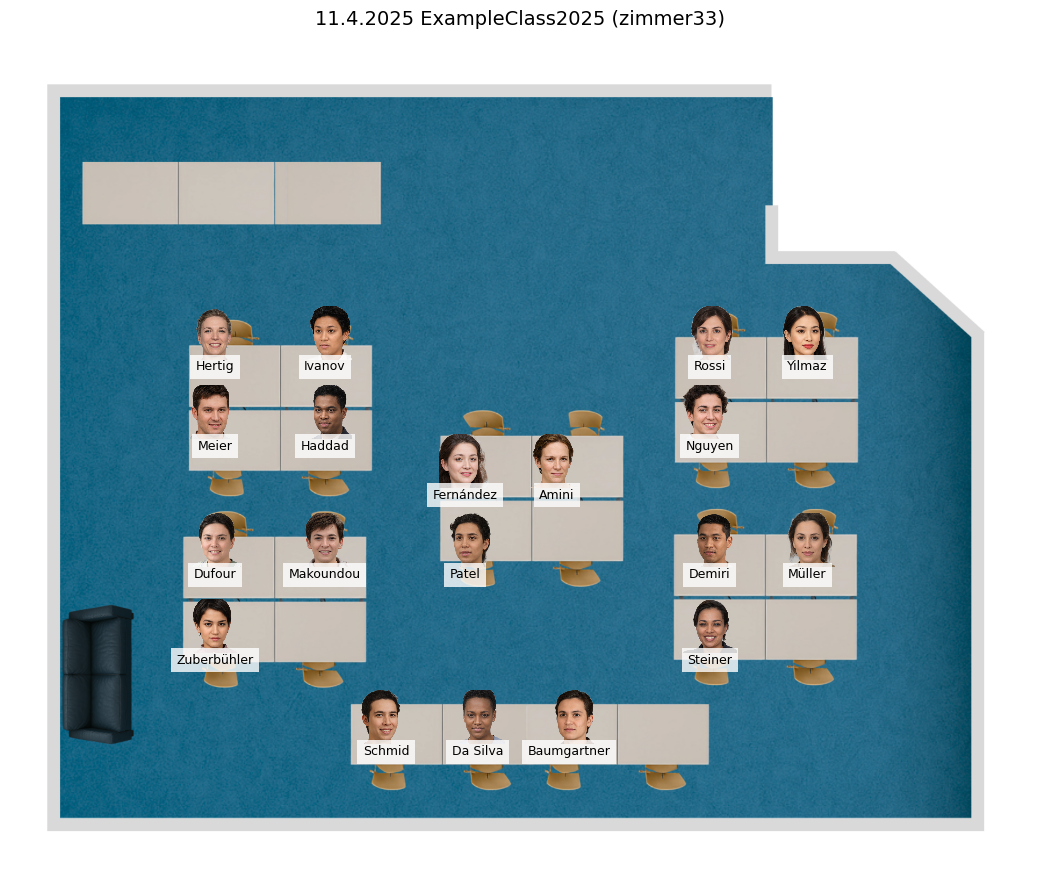

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from datetime import datetime
import random
import os


# --- EINSTELLUNGEN ---
avatar_pfad = "img/avatars"
floorplan_pfad = "img/floorplans/zimmer33.png"
csv_pfad = "data/ExampleClass2025.csv"
tisch_csv_pfad = "data/zimmer33.csv"  # NEU: Pfad zur Tisch-Koordinaten-CSV

datum = datetime.today().strftime("%-d.%-m.%Y")
zimmer = (floorplan_pfad.split("/")[-1]).split(".png")[0]
klasse = csv_pfad.split("/")[-1].split(".csv")[0]

export_pfad = f"export/sitzordnung {datum} {klasse} {zimmer}.png"

avatar_zoom = 0.15
schriftgroesse = 9

# --- TISCH-KOORDINATEN LADEN ---
tisch_df = pd.read_csv(tisch_csv_pfad)
tische = list(zip(tisch_df["X"], tisch_df["Y"]))

# --- KLASSEN-DATEN LADEN ---
df = pd.read_csv(csv_pfad, sep=",")
df = df.dropna(subset=["L_NAME", "L_AVATAR"])
personen = df[["L_NAME", "L_AVATAR"]].values.tolist()
random.shuffle(personen)

personen = personen[:len(tische)]  # nur so viele wie Tische

# --- PLOT VORBEREITEN ---
fig, ax = plt.subplots(figsize=(12, 9))
raumplan = mpimg.imread(floorplan_pfad)
ax.imshow(raumplan, origin='upper')

# --- AVATARE PLATZIEREN ---
for (x, y), (name, avatar_file) in zip(tische, personen):
    avatar_path = os.path.join(avatar_pfad, avatar_file)
    
    if os.path.exists(avatar_path):
        avatar_img = mpimg.imread(avatar_path)
        imagebox = OffsetImage(avatar_img, zoom=avatar_zoom)
        ab = AnnotationBbox(imagebox, (x + 75, y + 50), frameon=False)  # zentriert bei 150x100 Tisch
        ax.add_artist(ab)
    else:
        print(f"❌ Avatar fehlt: {avatar_path}")

    # Optional: Namen anzeigen
    ax.text(
        x + 75, y + 95, name,
        fontsize=schriftgroesse,
        ha='center', va='top',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )

# --- ANZEIGE ---
ax.axis('off')

plt.title(f"{datum} {klasse} ({zimmer})", fontsize=14)
plt.tight_layout()

# Exportieren
os.makedirs(os.path.dirname(export_pfad), exist_ok=True)
plt.savefig(export_pfad, dpi=300, bbox_inches='tight')
plt.show()

## 🔭 Ausblick

Die automatisierte Sitzplan-Visualisierung eröffnet auch für die Zukunft spannende Möglichkeiten.  

Zum Beispiel könnte die Sitzordnung in Zukunft **vollautomatisch jeden Morgen (z. B. um 06:00 Uhr)** generiert werden – basierend auf der aktuellen Klassenliste. Anschliessend könnte:

- Der fertige Plan **per E-Mail** direkt an alle Lernenden gesendet werden  
- Oder alternativ: Der Plan könnte auf einer **geschützten Online-Seite** veröffentlicht werden, auf die nur die Lernenden und Lehrpersonen Zugriff haben

So entfällt auch die letzte manuelle Tätigkeit – und die Lernenden sehen ihren Platz bereits **bevor der Unterricht beginnt**.  
Das sorgt für einen noch reibungsloseren Start in den Unterricht, spart weitere Zeit und erhöht die Verbindlichkeit und Klarheit.

Die technische Grundlage dafür ist jetzt schon vorhanden – es braucht lediglich noch eine Anbindung an den E-Mail-Versand oder eine kleine Webplattform.  
Das ist ein nächster, realistischer Schritt – mit grossem Nutzen.
